<a href="https://colab.research.google.com/github/debbydauda/Kaggle-dataset/blob/main/Main_Salary_Predictor_Project_for_deborah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Problem Definition**
The goal of this project is to develop a machine learning model that predicts salaries based on various factors such as education, experience, job title, industry, and location. Salary prediction is useful for job seekers, HR professionals, and organizations to understand salary expectations and market trends.

### **2. Problem Type**
This is a **regression problem** because the target variable (salary) is continuous.

### **3. Model to be Used**
Since it's a regression problem, potential models include:
- **Linear Regression** (if the relationship between features and salary is linear)
- **Random Forest Regressor** (for capturing non-linear relationships)

### **4. Data Dictionary (Features and Target Variable)**
**Dataset includes:**

| Column Name         | Data Type | Description |
|---------------------|----------|-------------|
| **Age**            | float64  | The age of the individual in years. |
| **Gender**         | object   | The gender identity of the individual (e.g., Male, Female, Non-binary, etc.). |
| **Education Level** | int64    | The highest level of education attained, represented numerically (e.g., 1 = High School, 2 = Bachelor's, 3 = Master's, etc.). |
| **Job Title**      | object   | The title or designation of the individual's job. |
| **Years of Experience** | float64  | The total number of years the individual has worked professionally. |
| **Salary**         | float64  | The annual salary of the individual in the local currency. |
| **Country**        | object   | The country where the individual is employed. |
| **Race**          | object   | The racial or ethnic background of the individual. |
| **Senior**        | int64    | A binary flag indicating if the individual is in a senior role (e.g., 1 = Senior, 0 = Not Senior). |
- **Target Variable** : **Salary**

### **5. Data Source**
- **Kaggle datasets**

### **6. Evaluation Metrics**
Since it’s a regression problem, suitable metrics include:
- **Mean Absolute Error (MAE)** – Measures average absolute difference between actual and predicted salaries.
- **Mean Squared Error (MSE)** – Penalizes large errors more than MAE.
- **R-squared (R²)** – Determines how well the model explains salary variation.

### **7. Tools & Libraries**
- **Jupyter Notebook** for development
- **Pandas & NumPy** for data manipulation
- **Matplotlib & Seaborn** for visualization
- **Scikit-learn** for modeling
- **XGBoost/LightGBM** for advanced regression modeling


In [ ]:
## Import all necesssary languages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Load dataset
file_path = "/content/Salary (1).csv"
salary_pred = pd.read_csv(file_path)

# Display first few rows
salary_pred.head()



,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [ ]:
# Check the dtype of the columns
print(salary_pred.dtypes)

Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object


In [ ]:
# Converting 'Age', 'Years of Experience', and 'Salary' to integer
# Using astype(int) to convert
salary_pred['Age'] = salary_pred['Age'].astype(int)
salary_pred['Years of Experience'] = salary_pred['Years of Experience'].astype(int)
salary_pred['Salary'] = salary_pred['Salary'].astype(int)
print(salary_pred.dtypes)

Age                     int64
Gender                 object
Education Level         int64
Job Title              object
Years of Experience     int64
Salary                  int64
Country                object
Race                   object
Senior                  int64
dtype: object


In [ ]:
salary_pred.info()
salary_pred.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  6684 non-null   int64 
 1   Gender               6684 non-null   object
 2   Education Level      6684 non-null   int64 
 3   Job Title            6684 non-null   object
 4   Years of Experience  6684 non-null   int64 
 5   Salary               6684 non-null   int64 
 6   Country              6684 non-null   object
 7   Race                 6684 non-null   object
 8   Senior               6684 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 470.1+ KB


(6684, 9)

In [ ]:
# Checking for missing values and duplicates
missing_values = salary_pred.isnull().sum()
duplicates = salary_pred.duplicated().sum()

# Displaying the results
print('Missing Values:')
print(missing_values[missing_values > 0])
print(f'Total Duplicates: {duplicates}')

Missing Values:
Series([], dtype: int64)
Total Duplicates: 1536


In [ ]:
salary_pred.drop_duplicates(inplace=True)

# Displaying the new shape of the dataframe
print(f' Cleaned shape: {salary_pred.shape}')

 Cleaned shape: (5148, 9)


In [ ]:
salary_pred['Senior'].value_counts()

,count
Senior,
0,4323
1,825


In [ ]:
salary_pred.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,34.001166,1.640831,8.335470,114272.010878,0.160256
std,7.762879,0.882762,6.234889,52458.684724,0.366879
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,113448.500000,0.000000
75%,39.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


## EDA

In [ ]:
salary_pred.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5,90000,UK,White,0
1,28,Female,2,Data Analyst,3,65000,USA,Hispanic,0
2,45,Male,3,Manager,15,150000,Canada,White,1
3,36,Female,1,Sales Associate,7,60000,USA,Hispanic,0
4,52,Male,2,Director,20,200000,USA,Asian,0


## DATA VISUALIZATION

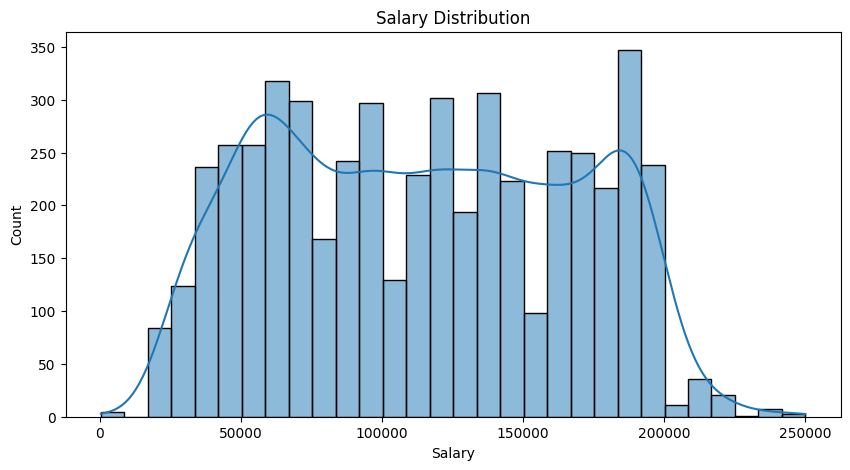

In [ ]:
# Histogram of Salary Distribution
plt.figure(figsize=(10, 5))
sns.histplot(salary_pred['Salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.savefig('hist_plot_salary_dist.jpeg', dpi=300, bbox_inches='tight')
plt.show()


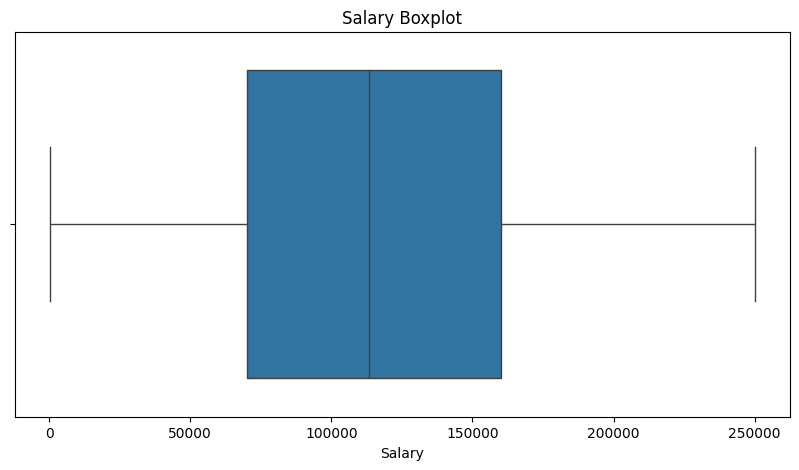

In [ ]:
# Set up plot size
plt.figure(figsize=(10,5))
# Boxplot to check Salary outliers
sns.boxplot(x=salary_pred['Salary']).set_title('Salary Boxplot')
plt.savefig('box_plot_salary_dist.png', dpi=300, bbox_inches='tight')

plt.show()


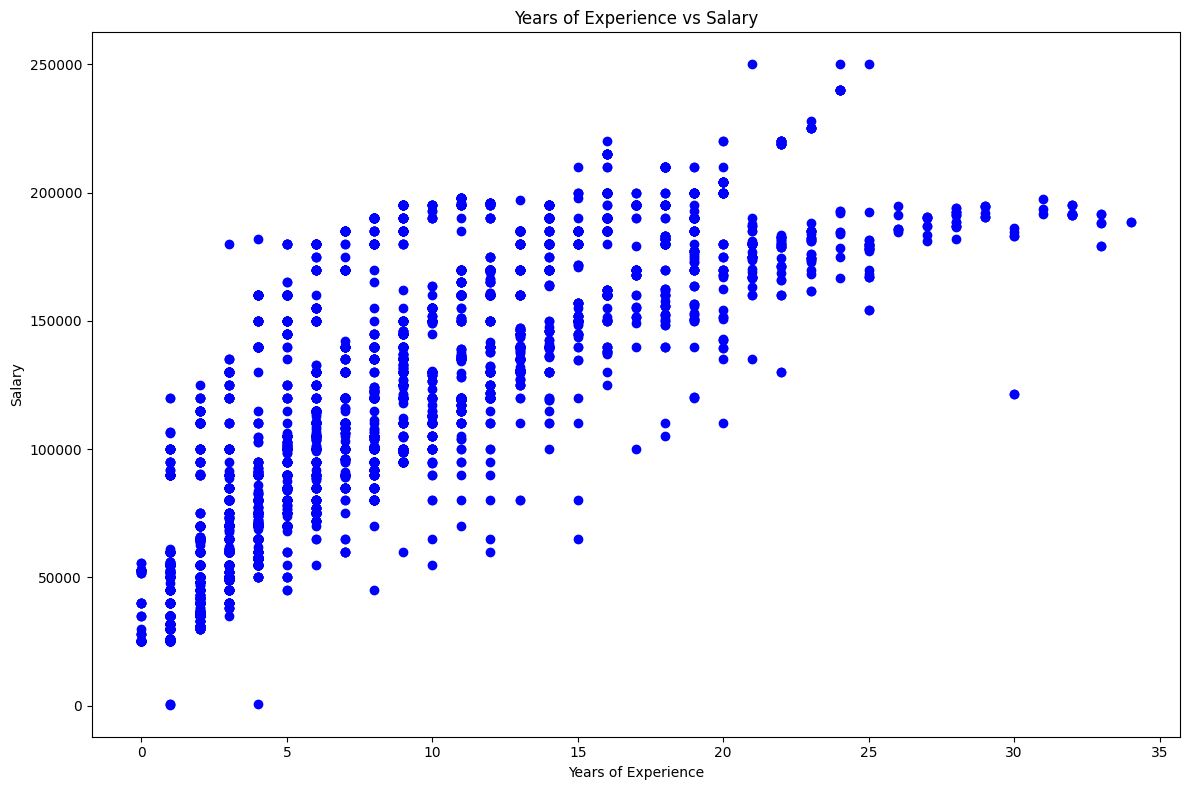

In [ ]:
# Set plot Size
plt.figure(figsize=(12,8))

# 1. Scatter Plots for correlation
plt.scatter(salary_pred['Years of Experience'], salary_pred['Salary'], color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.savefig('scatter_plot_years_vs_salary_dist.jpeg', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

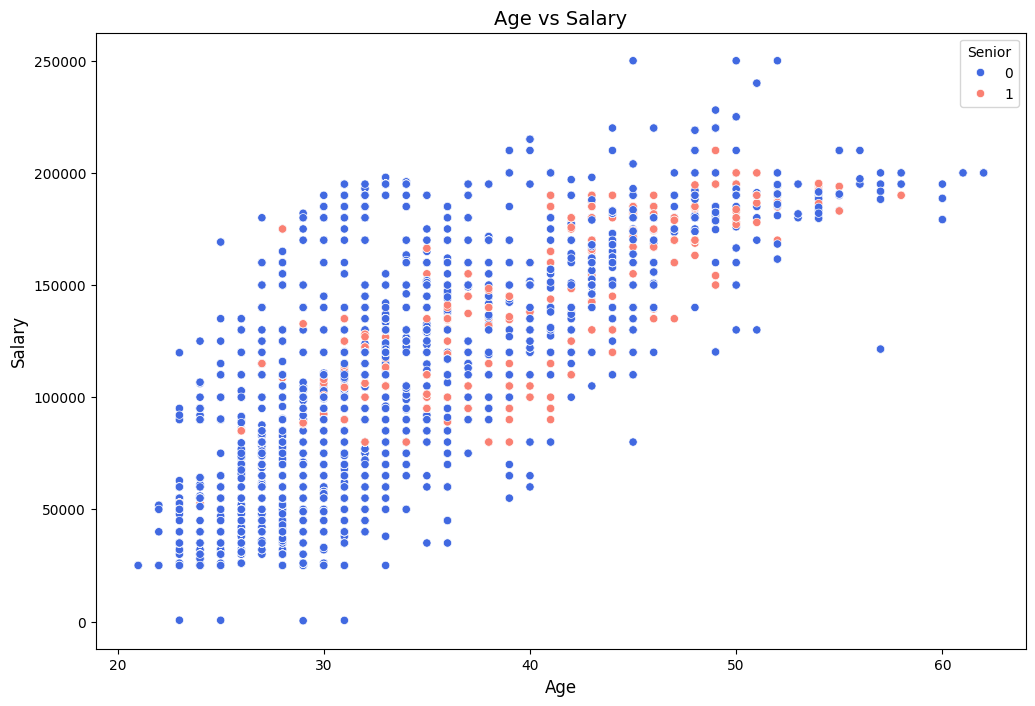

In [ ]:
# 2. Scatter Plots for correlation
# Set plot Size
plt.figure(figsize=(12,8))

sns.scatterplot(data=salary_pred, x='Age', y='Salary', hue='Senior', palette=['royalblue', 'salmon'])

# Titles and labels
plt.title('Age vs Salary', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)

plt.legend(title='Senior')  # Add a legend
plt.savefig('scatter_plot_Age_vs_salary_dist.jpeg', dpi=300, bbox_inches='tight')

plt.show()


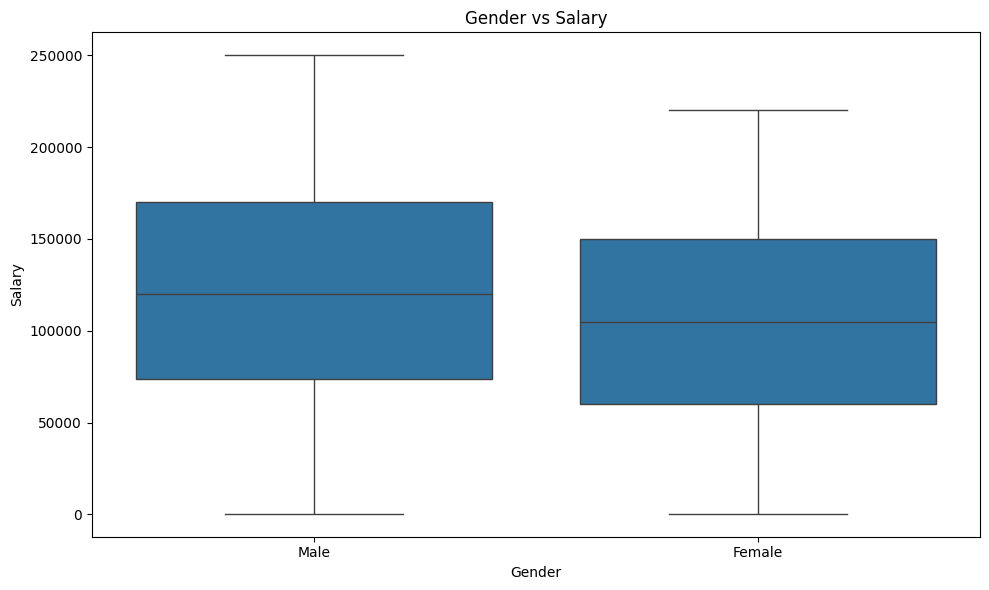

In [ ]:
# Boxplots to compare Salary across categorical variables
# Set plot Size
plt.figure(figsize=(10, 6))

# Compare Gender and Salary
sns.boxplot(x='Gender', y='Salary', data=salary_pred)
plt.title('Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()

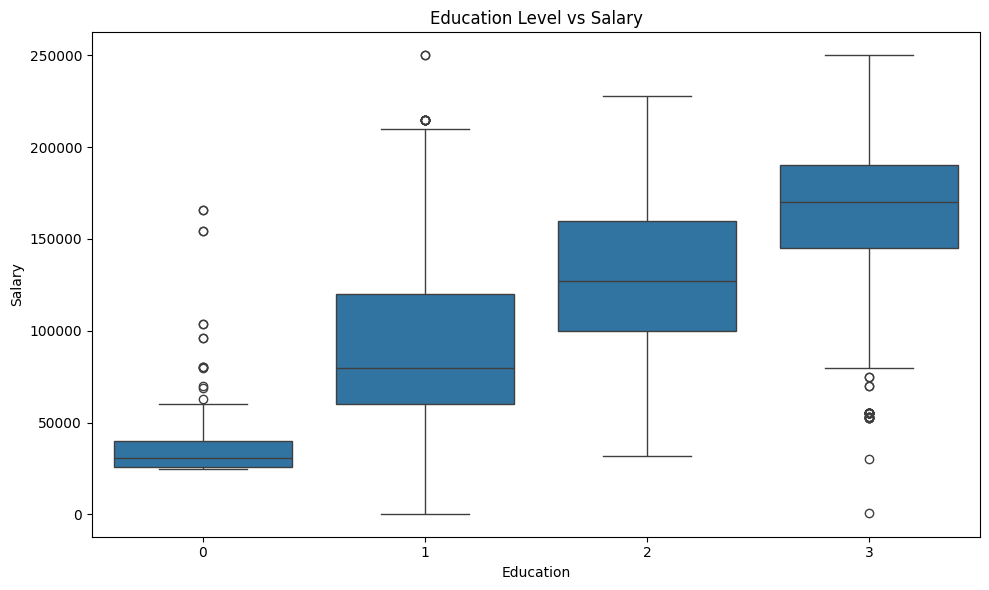

In [ ]:
# Compare Education Level and Salary
# Set plot Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=salary_pred)
plt.title('Education Level vs Salary')
plt.xlabel('Education')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()

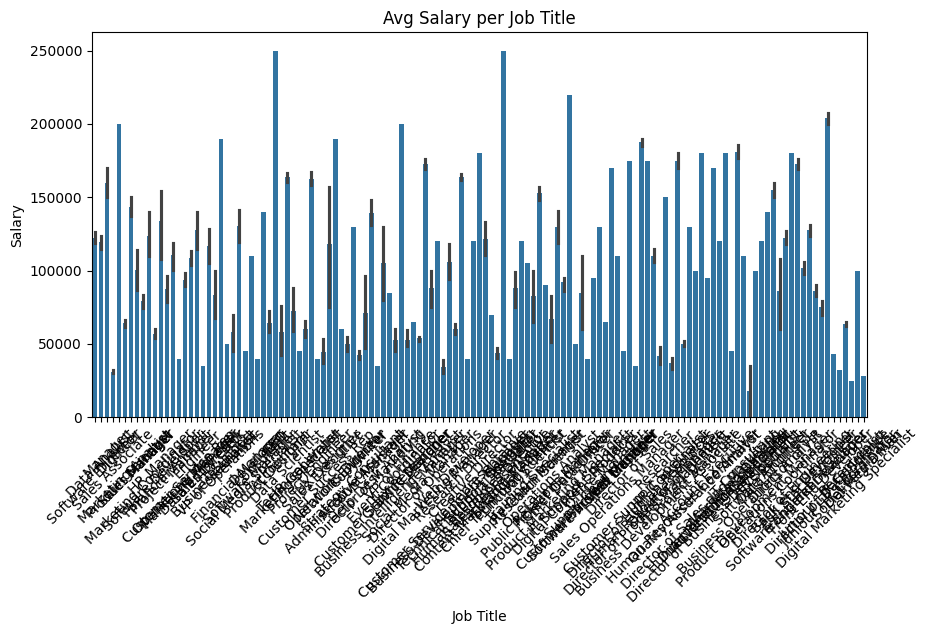

In [ ]:
# Bar Charts for Average Salary per Job Title
# Set plot Size
plt.figure(figsize=(10, 5))
sns.barplot(x='Job Title', y='Salary', data=salary_pred, estimator=np.mean)
plt.title('Avg Salary per Job Title')
plt.xticks(rotation=45)
plt.savefig('Avg_salary_job_dist.jpeg', dpi=300, bbox_inches='tight')

plt.show()


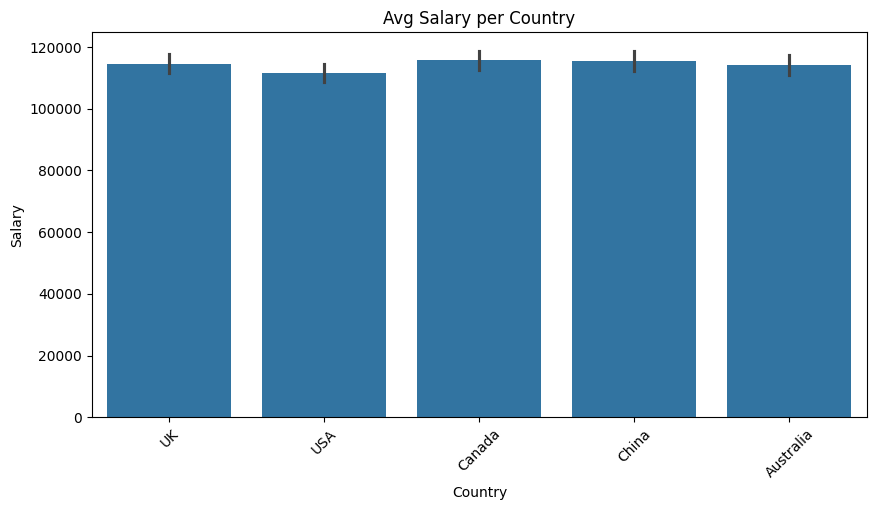

In [ ]:
# Bar Charts for Average Salary per Job Title
# Set plot Size
plt.figure(figsize=(10, 5))
sns.barplot(x='Country', y='Salary', data=salary_pred, estimator=np.mean)
plt.title('Avg Salary per Country')
plt.xticks(rotation=45)
plt.savefig('Avg_salary_country_dist.jpeg', dpi=300, bbox_inches='tight')
plt.show()


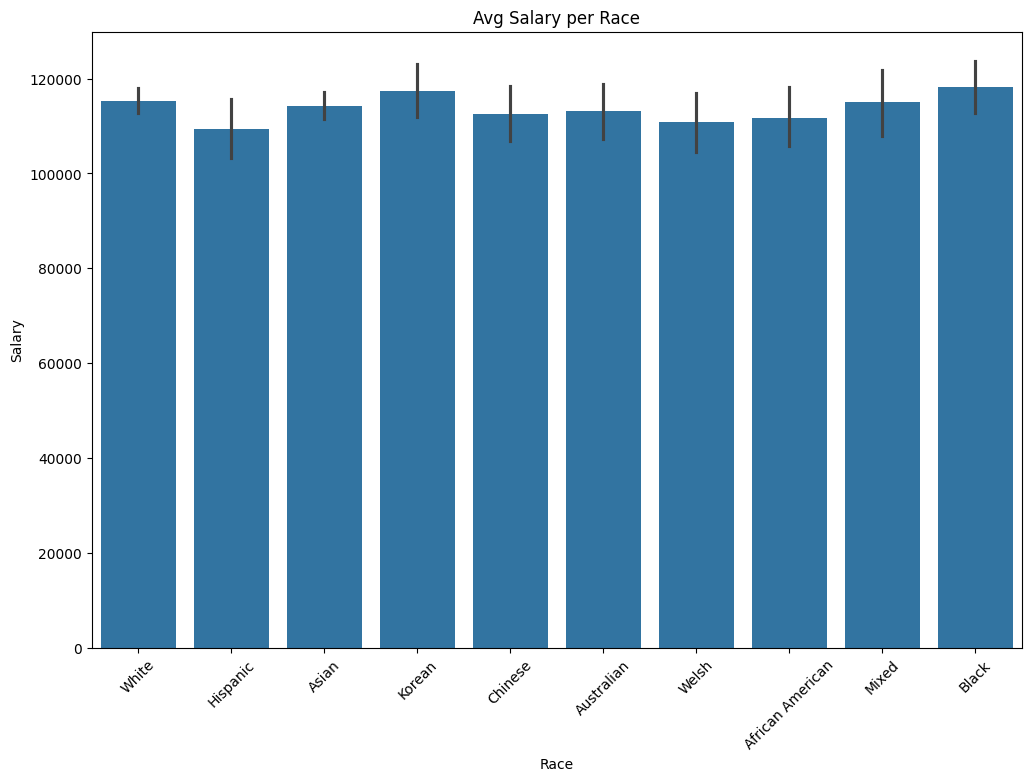

In [ ]:
# Bar Charts for Average Salary per Race
# Set plot Size
plt.figure(figsize=(12, 8))
sns.barplot(x='Race', y='Salary', data=salary_pred, estimator=np.mean)
plt.title('Avg Salary per Race')
plt.xticks(rotation=45)
plt.savefig('Avg_salary_race_dist.jpeg', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
salary_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5148 entries, 0 to 6682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  5148 non-null   int64 
 1   Gender               5148 non-null   object
 2   Education Level      5148 non-null   int64 
 3   Job Title            5148 non-null   object
 4   Years of Experience  5148 non-null   int64 
 5   Salary               5148 non-null   int64 
 6   Country              5148 non-null   object
 7   Race                 5148 non-null   object
 8   Senior               5148 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 402.2+ KB


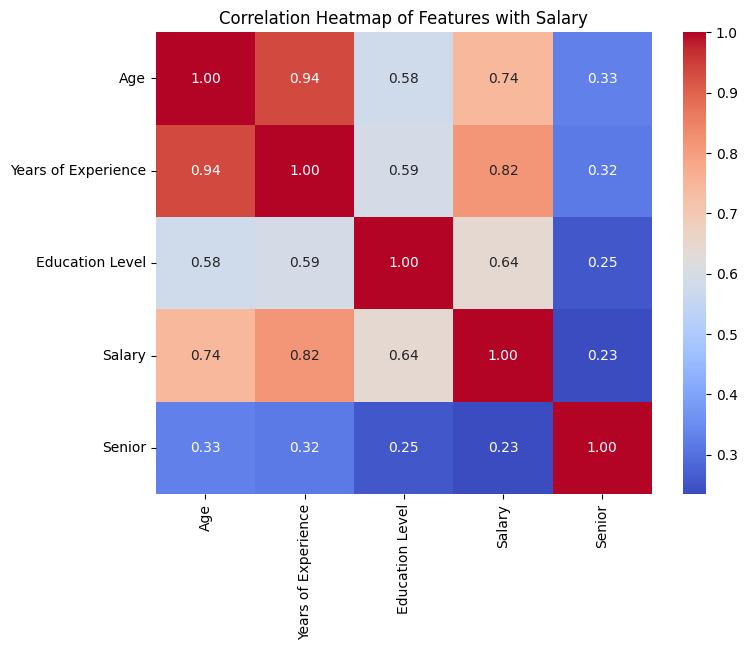

In [ ]:
# Correlation Heatmap to identify key predictors of Salary
plt.figure(figsize=(8, 6))
num_variables = salary_pred[['Age', 'Years of Experience', 'Education Level', 'Salary', 'Senior']]
corr = num_variables.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features with Salary')
plt.savefig('Corr_heatmap.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
salary_pred['Senior'].value_counts()

,count
Senior,
0,4323
1,825


## MACHINE LEARNING

In [ ]:
salary_pred.head()
salary_pred.info()
salary_pred.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5148 entries, 0 to 6682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  5148 non-null   int64 
 1   Gender               5148 non-null   object
 2   Education Level      5148 non-null   int64 
 3   Job Title            5148 non-null   object
 4   Years of Experience  5148 non-null   int64 
 5   Salary               5148 non-null   int64 
 6   Country              5148 non-null   object
 7   Race                 5148 non-null   object
 8   Senior               5148 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 402.2+ KB


(5148, 9)

In [ ]:
num_features = salary_pred.select_dtypes(include=['int64']).columns.tolist() # Numerical variables
cat_features = salary_pred.select_dtypes(include=['object']).columns.tolist() #Categorical variables

In [ ]:
# Step 1: Seperate features(X) and Target variables(y)
# Everything except target variable
X = salary_pred.drop(labels="Salary", axis=1)

# Target variable
y = salary_pred.Salary


In [ ]:
# Step 2
# Preprocessing: Scaling numerical and encoding categorical data with One-hot
num_transformer = StandardScaler()
X = pd.get_dummies(X, columns=cat_features, drop_first=True)



In [ ]:
# Step 3
# Split Data into Train Data and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# Step 4: Model
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
linear_val_pred = linear_model.predict(X_val)
linear_val_mse = mean_squared_error(y_val, linear_val_pred)
linear_val_r2 = r2_score(y_val, linear_val_pred)

In [ ]:


linear_val_r2

0.8388433588882548

In [ ]:
linear_val_mse

439308857.754747

In [ ]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
rf_val_pred = random_forest.predict(X_val)
rf_val_mae = mean_absolute_error(y_val, rf_val_pred)
rf_val_r2 = r2_score(y_val, rf_val_pred)

In [ ]:

rf_val_r2

0.9631993616218975

In [ ]:
rf_val_mae

4747.9099693128555

### Hyperparameter Tuning

In [ ]:
rf_tuned = RandomForestRegressor(
    n_estimators=300,
    max_depth=100,
    min_samples_leaf=2,
    random_state=42)
rf_tuned.fit(X_train, y_train)
tuned_val_pred = rf_tuned.predict(X_val)
tuned_val_mse = mean_squared_error(y_val, tuned_val_pred)
tuned_val_r2 = r2_score(y_val, tuned_val_pred)

print("Random Forest Regressor (n_estimators = 300, max_depth = 100 and min_samples_leaf = 2):")
print("MSE:", tuned_val_mse)
print("R-squared:", tuned_val_r2)

Random Forest Regressor (n_estimators = 300, max_depth = 100 and min_samples_leaf = 2):
MSE: 98878316.1255954
R-squared: 0.9637273480279284


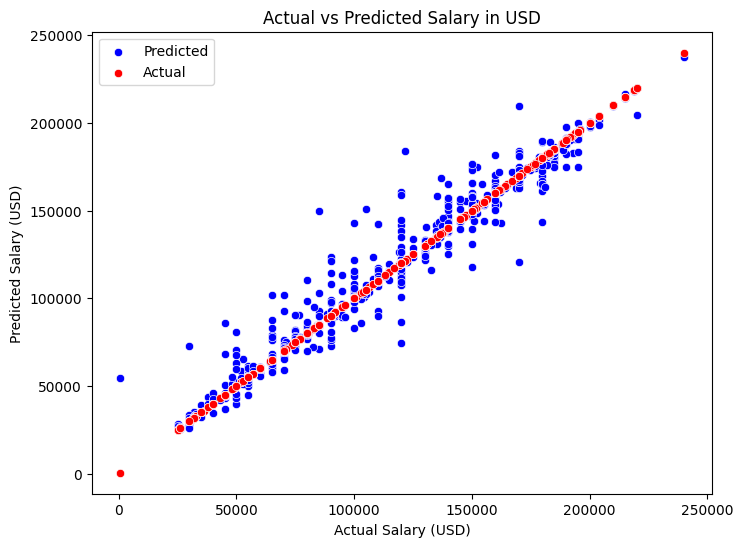

In [ ]:
# Plot Actual vs Predicted
y_pred = random_forest.predict(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label="Predicted")
sns.scatterplot(x=y_test, y=y_test, color='red', label="Actual")

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs Predicted Salary in USD")
plt.legend()
plt.show()

In [ ]:
import joblib

joblib.dump(random_forest, "random_forest_salary_model.pkl")

# Save feature columns
joblib.dump(X.columns, "feature_columns.pkl")

['feature_columns.pkl']

In [ ]:
# Installing Gradio to create the interface
%pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
t

In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load trained Random Forest model ONCE (Avoids reloading)
rf_model = joblib.load("random_forest_salary_model.pkl")

# Load feature columns (instead of dataset)
feature_columns = joblib.load("feature_columns.pkl")  # Load feature columns

# Extract job titles dynamically from feature columns (if encoded)
job_titles = [col.replace("Job Title_", "") for col in feature_columns if col.startswith("Job Title_")]

# Function to predict salary
def predict_salary(age, gender, education_level, job_title, years_of_experience, country, race, senior):
    # Prepare input data
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Education Level': [education_level],
        'Job Title': [job_title],
        'Years of Experience': [years_of_experience],
        'Country': [country],
        'Race': [race],
        'Senior': [senior]
    })

    # Mapping for Education Level
    education_mapping = {
        "High School": 1,
        "Bachelor's": 2,
        "Master's": 3,
        "PhD": 4
    }
    input_data['Education Level'] = input_data['Education Level'].map(education_mapping)

    # Encode categorical variables using pandas get_dummies for one-hot encoding
    input_data = pd.get_dummies(input_data, columns=['Gender', 'Job Title', 'Country', 'Race'], drop_first=True)

    # Align columns with the training data
    input_data = input_data.reindex(columns=feature_columns, fill_value=0)  # Reindex using feature_columns

    # Predict salary
    predicted_salary = rf_model.predict(input_data)

    return f"Predicted Salary: ${predicted_salary[0]:,.2f}"

# Create Gradio UI
iface = gr.Interface(
    fn=predict_salary,
    inputs=[
        gr.Slider(18, 100, step=1, value=30, label='Age'),
        gr.Radio(["Male", "Female"], label='Gender'),
        gr.Dropdown(["High School", "Bachelor's", "Master's", "PhD"], label="Education Level"),
        gr.Dropdown(choices=job_titles, label="Job Title"),  # Dynamically loaded job titles
        gr.Slider(0, 50, step=1, value=5, label='Years of Experience'),
        gr.Dropdown(["UK", "USA", "Canada", "China", "Australia"], label="Country"),
        gr.Dropdown(["White", "Hispanic", "Asian", "Korean", "Chinese", "Welsh", "African American", "Mixed", "Black"], label="Race"),
        gr.Radio([0, 1], label='Senior (0: No, 1: Yes)')
    ],
    outputs="text",
    title="Salary Prediction Model",
    description="Enter your details to predict your salary based on the trained Random Forest model."
)

# Launch Gradio
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://69d23d5eda8f876d79.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
